In [1]:
'''
Reading basic data from iphone inputs
'''

'\nReading basic data from iphone inputs\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import os
import sys
from operator import itemgetter
import random
from optparse import OptionParser
from copy import copy
import numpy as np
from scipy.stats import kstest, mstats
import string
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
# import pymc as pm


In [4]:
file_name = '../../data/iphone_responses/backend_patientresponse.csv'
dtypes = [int, datetime, string, datetime, string, int, int]

In [5]:
df = pd.read_csv(file_name, parse_dates=['workday', 'date'])
df

,id,question_id,workday,response,date,patient_id,checklist_id,user_id
0,12,0601,2016-06-20,Y,2016-06-20 12:16:05,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
1,13,0801,2016-06-20,Y,2016-06-20 12:16:08,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
2,14,0301,2016-06-20,Y,2016-06-20 12:16:14,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
3,15,0401,2016-06-20,N,2016-06-20 12:16:17,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
4,16,0501,2016-06-20,Y,2016-06-20 12:16:21,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
5,17,0701,2016-06-20,Y,2016-06-20 12:16:25,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
6,18,0702,2016-06-20,N,2016-06-20 12:16:26,d23391bd6c0061609234a92c8091f592ce40f15d,1,10
7,19,0601,2016-06-20,N,2016-06-20 12:32:40,1a9111ca9dc49ac7da084fe3b79a05bcc70ab2cc,1,10
8,20,0801,2016-06-20,Y,2016-06-20 12:32:43,1a9111ca9dc49ac7da084fe3b79a05bcc70ab2cc,1,10
9,21,0301,2016-06-20,N,2016-06-20 12:32:48,1a9111ca9dc49ac7da084fe3b79a05bcc70ab2cc,1,10


In [6]:
doctor_id = df.user_id.unique().tolist()
doctor_id

[10, 16, 33, 7, 55, 54, 57, 20, 56, 8, 18, 58, 3, 21]

In [7]:
doctor_count = {} #count number of inputs per doctor
for doc in df.user_id.tolist():
    if doc not in doctor_count:
        doctor_count[doc] = 1
    else:
        doctor_count[doc] += 1
doctor_count

{3: 61,
 7: 4,
 8: 16,
 10: 107,
 16: 186,
 18: 87,
 20: 139,
 21: 11,
 33: 67,
 54: 484,
 55: 213,
 56: 327,
 57: 143,
 58: 1978}

(array([ 10.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    4. ,   201.4,   398.8,   596.2,   793.6,   991. ,  1188.4,
         1385.8,  1583.2,  1780.6,  1978. ]),
 <a list of 10 Patch objects>)

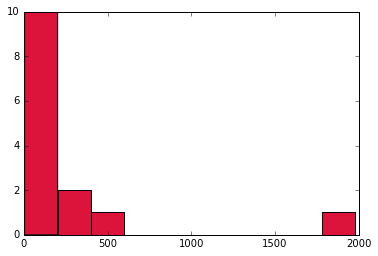

In [8]:
plt.hist(list(doctor_count.values()), color='crimson' )

In [9]:
df['timebin'] = df.date.map(lambda t: t.strftime('%Y-%m-%d %H'))
df['daybin'] = df.date.map(lambda t: t.strftime('%Y-%m-%d'))

df.columns

Index(['id', 'question_id', 'workday', 'response', 'date', 'patient_id',
       'checklist_id', 'user_id', 'timebin', 'daybin'],
      dtype='object')

In [10]:
most_touch = df[df['timebin'] == '2016-08-03 19']


In [11]:
time_series = df['timebin'].value_counts().sort_index()
time_series

2016-06-20 12    14
2016-06-20 13    30
2016-06-20 14    57
2016-06-20 15    68
2016-06-20 16    16
2016-06-21 13    24
2016-06-21 14    26
2016-06-21 15    30
2016-06-21 16    26
2016-06-21 17     6
2016-06-21 18    32
2016-07-12 16     1
2016-07-12 17     1
2016-07-29 15    55
2016-07-29 16     9
2016-07-30 16     9
2016-07-31 12    18
2016-07-31 13    33
2016-07-31 14    11
2016-08-02 12    13
2016-08-02 13     7
2016-08-02 14    13
2016-08-02 16    19
2016-08-02 17    24
2016-08-03 12     8
2016-08-03 13     5
2016-08-03 14    16
2016-08-03 15    28
2016-08-03 16     9
2016-08-03 19    80
                 ..
2016-11-12 15    23
2016-11-12 16    22
2016-11-12 17     7
2016-11-12 19     2
2016-11-12 20    11
2016-11-13 13    16
2016-11-13 14    14
2016-11-13 15    26
2016-11-13 16    10
2016-11-13 17     9
2016-11-13 18     7
2016-11-14 13    19
2016-11-14 14    29
2016-11-14 15    15
2016-11-14 16     7
2016-11-15 13     9
2016-11-15 14     7
2016-11-16 20    11
2016-11-17 14    36


In [12]:
day_series = df['daybin'].value_counts().sort_index()


In [13]:
df_timeseries =  time_series.to_frame()
df_timeseries.index = pd.to_datetime(df_timeseries.index)

# df_timeseries['timey'] = df_timeseries.time.map(lambda t: datetime.datetime.strptime(t, '%Y-%m-%d %H'))

df_timeseries.columns = ['occurence']
df_timeseries['time'] = df_timeseries.index
df_timeseries

,occurence,time
2016-06-20 12:00:00,14,2016-06-20 12:00:00
2016-06-20 13:00:00,30,2016-06-20 13:00:00
2016-06-20 14:00:00,57,2016-06-20 14:00:00
2016-06-20 15:00:00,68,2016-06-20 15:00:00
2016-06-20 16:00:00,16,2016-06-20 16:00:00
2016-06-21 13:00:00,24,2016-06-21 13:00:00
2016-06-21 14:00:00,26,2016-06-21 14:00:00
2016-06-21 15:00:00,30,2016-06-21 15:00:00
2016-06-21 16:00:00,26,2016-06-21 16:00:00
2016-06-21 17:00:00,6,2016-06-21 17:00:00


In [14]:
df_max = df_timeseries.groupby(pd.TimeGrouper('D'), sort=True)['occurence'].max()
df_max = df_max.dropna()

df_max

2016-06-20    68.0
2016-06-21    32.0
2016-07-12     1.0
2016-07-29    55.0
2016-07-30     9.0
2016-07-31    33.0
2016-08-02    24.0
2016-08-03    80.0
2016-08-04    26.0
2016-08-05    20.0
2016-08-06    22.0
2016-08-08    18.0
2016-08-11    37.0
2016-08-12    39.0
2016-08-17     4.0
2016-08-18    30.0
2016-08-19    10.0
2016-08-25    24.0
2016-08-29    31.0
2016-08-31    41.0
2016-09-06    35.0
2016-09-07    57.0
2016-09-08    61.0
2016-09-09    48.0
2016-09-12     1.0
2016-09-13    32.0
2016-09-14    82.0
2016-09-15    48.0
2016-09-16    43.0
2016-09-19    25.0
              ... 
2016-10-06    16.0
2016-10-07    23.0
2016-10-09    42.0
2016-10-10    12.0
2016-10-11    15.0
2016-10-12    13.0
2016-10-13    21.0
2016-10-14    23.0
2016-10-18     1.0
2016-10-21     2.0
2016-10-25    28.0
2016-10-26    34.0
2016-10-28     6.0
2016-10-31    23.0
2016-11-01    24.0
2016-11-04     4.0
2016-11-07     1.0
2016-11-09     7.0
2016-11-10     2.0
2016-11-12    30.0
2016-11-13    26.0
2016-11-14  

In [15]:
df_dayseries =  day_series.to_frame()
df_dayseries.index = pd.to_datetime(df_dayseries.index)

# df_timeseries['timey'] = df_timeseries.time.map(lambda t: datetime.datetime.strptime(t, '%Y-%m-%d %H'))

df_dayseries.columns = ['occurence']
df_dayseries['time'] = df_dayseries.index
df_dayseries

,occurence,time
2016-06-20,185,2016-06-20
2016-06-21,144,2016-06-21
2016-07-12,2,2016-07-12
2016-07-29,64,2016-07-29
2016-07-30,9,2016-07-30
2016-07-31,62,2016-07-31
2016-08-02,76,2016-08-02
2016-08-03,146,2016-08-03
2016-08-04,85,2016-08-04
2016-08-05,20,2016-08-05


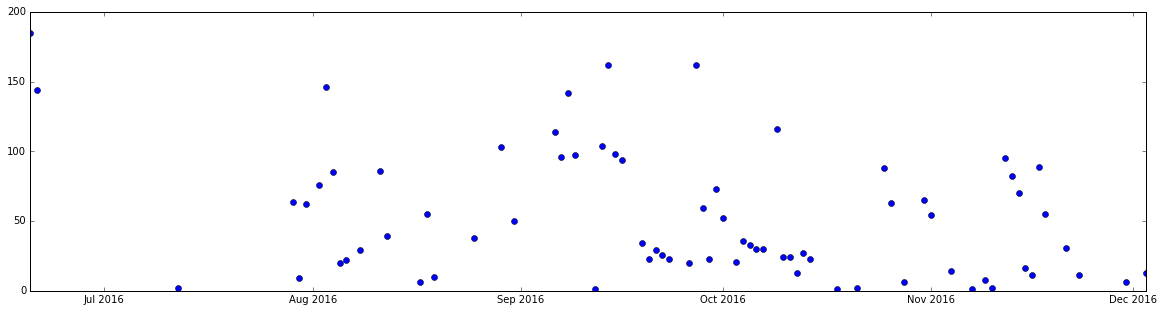

In [16]:
plt.figure(figsize=(20, 5))

plt.plot_date(df_dayseries.time, df_dayseries.occurence,xdate=True)

In [17]:
base = df_dayseries.index[0].to_datetime()
top = df_dayseries.index[-1].to_datetime()
print((top-base).days)
days = (top-base).days

date_list = [base + datetime.timedelta(days=x) for x in range(0, days)]

df_days = pd.DataFrame(index=date_list, columns=['occurence'])
df_days.occurence.fillna(df_dayseries.occurence, inplace=True)
df_days.occurence.fillna(0, inplace=True)

df_days.reset_index(inplace=True)
df_days.columns = ['time', 'occurence']


166


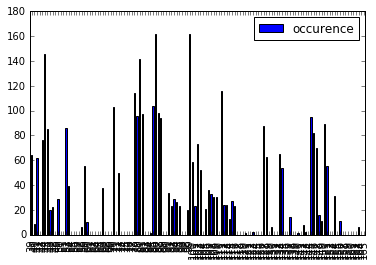

In [18]:
df_days[39:].plot(kind = 'bar')


In [19]:
base = df_timeseries.index[0].to_datetime()
top = df_timeseries.index[-1].to_datetime()

hours = int((top-base).total_seconds()//3600)

date_list = [base + datetime.timedelta(hours=x) for x in range(0, hours)]

df_time = pd.DataFrame(index=date_list, columns=['occurence'])
df_time.occurence.fillna(df_timeseries.occurence, inplace=True)
df_time.occurence.fillna(0, inplace=True)

df_time.reset_index(inplace=True)
df_time.columns = ['time', 'occurence']

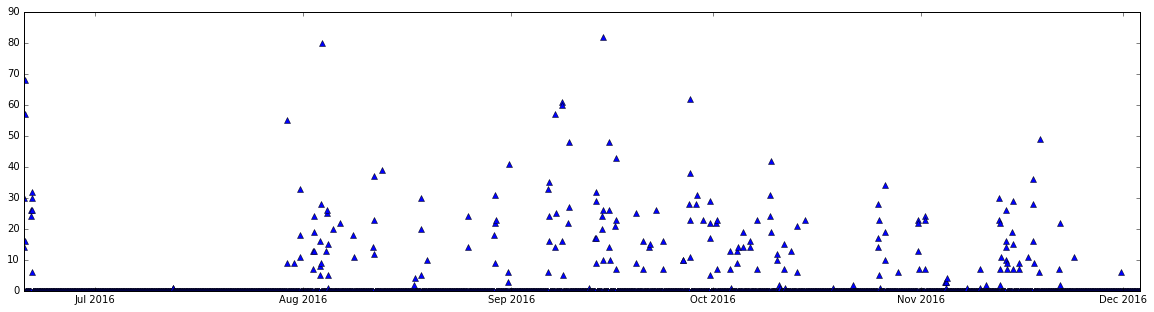

In [20]:
plt.figure(figsize=(20, 5))

plt.plot_date(df_time.time, df_time.occurence,xdate=True, fmt='^')



In [21]:
save_dir = '../../result/iphoneapp/'

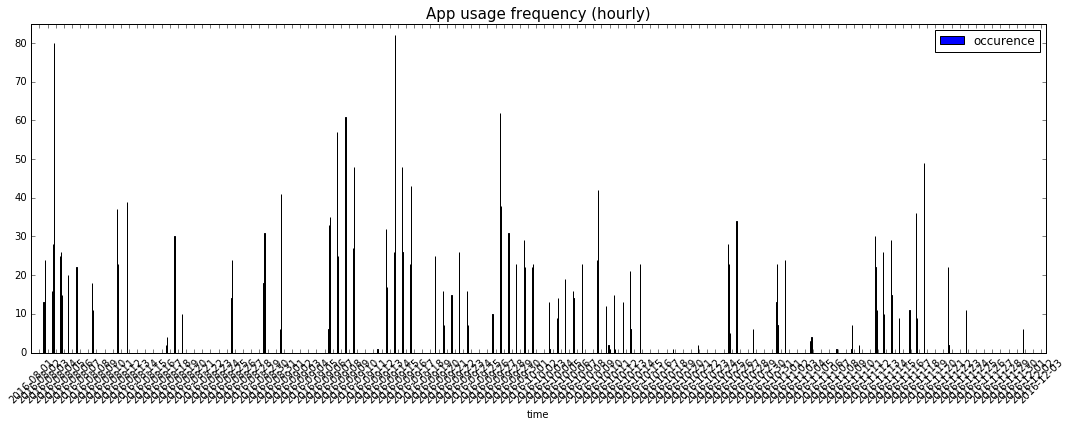

In [24]:
import matplotlib.dates as dates

df_time_wo_beta = copy(df_time)[996:]
df_time_wo_beta = df_time_wo_beta.reset_index(drop=True)

#setting xticks
xticks = df_time_wo_beta[df_time_wo_beta.time.dt.hour == 0].time
# xticks.apply(lambda t: t.astype(datetime))
xtick_labels = xticks.dt.strftime("%Y-%m-%d")
xticks = xticks.index


ax = df_time_wo_beta.plot(kind='bar', x='time', y='occurence', rot=45, figsize=(15,6))

ax.xaxis.set_ticks(pd.to_numeric(xticks.values))
ax.set_xticklabels(xtick_labels.values)


# xfmt = dates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=range(1, 32)))
# ax.xaxis.set_major_formatter(xfmt)
ax.set_ylim([0, 85])
plt.title('App usage frequency (hourly)', fontsize=15)
plt.tight_layout()
plt.savefig(save_dir + 'timeline120516.png', transparent=True)

In [23]:
df_time_wo_beta

,time,occurence
0,2016-08-01 00:00:00,0.0
1,2016-08-01 01:00:00,0.0
2,2016-08-01 02:00:00,0.0
3,2016-08-01 03:00:00,0.0
4,2016-08-01 04:00:00,0.0
5,2016-08-01 05:00:00,0.0
6,2016-08-01 06:00:00,0.0
7,2016-08-01 07:00:00,0.0
8,2016-08-01 08:00:00,0.0
9,2016-08-01 09:00:00,0.0


### recordings on time (for each day) 

In [24]:
df_timeseries2 = copy(df_timeseries)[15:]
df_timeseries2

,occurence,time
2016-07-30 16:00:00,9,2016-07-30 16:00:00
2016-07-31 12:00:00,18,2016-07-31 12:00:00
2016-07-31 13:00:00,33,2016-07-31 13:00:00
2016-07-31 14:00:00,11,2016-07-31 14:00:00
2016-08-02 12:00:00,13,2016-08-02 12:00:00
2016-08-02 13:00:00,7,2016-08-02 13:00:00
2016-08-02 14:00:00,13,2016-08-02 14:00:00
2016-08-02 16:00:00,19,2016-08-02 16:00:00
2016-08-02 17:00:00,24,2016-08-02 17:00:00
2016-08-03 12:00:00,8,2016-08-03 12:00:00


In [25]:
df_timeseries2['time'] = pd.to_datetime(df_timeseries2['time'])

In [26]:
df_timeseries2['hour'] = df_timeseries2['time'].dt.hour

In [27]:
df_timeseries2['month'] = df_timeseries2['time'].apply(lambda x: x.month) 

In [28]:
df_timeseries2['day'] = df_timeseries2['time'].apply(lambda x: x.day)

In [29]:
df_timeseries2['date'] = df_timeseries2['time'].apply(lambda x: x.strftime('%m-%d'))

In [30]:
index_hourly = sorted(df_timeseries2.hour.unique().tolist())
columns_hourly = df_timeseries2.date.unique().tolist()
df_hourly = pd.DataFrame(index=index_hourly, columns=columns_hourly)


In [31]:
print(columns_hourly, index_hourly)
combo = list(itertools.product(columns_hourly, index_hourly))
for c, i in combo:
    try:
        df_hourly[c][i] = df_timeseries2['occurence'][(df_timeseries2['date'] == c) & (df_timeseries2['hour'] == i)].values[0]
    except IndexError:
        df_hourly[c][i] = 0
        
        #   print(df_timeseries['occurence'][(df_timeseries['date'] == c) & (df_timeseries['hour'] == i)] )
df_hourly['avg'] = df_hourly.mean(axis=1)

cols = df_hourly.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hourly = df_hourly[cols]


['07-30', '07-31', '08-02', '08-03', '08-04', '08-05', '08-06', '08-08', '08-11', '08-12', '08-17', '08-18', '08-19', '08-25', '08-29', '08-31', '09-06', '09-07', '09-08', '09-09', '09-12', '09-13', '09-14', '09-15', '09-16', '09-19', '09-20', '09-21', '09-22', '09-23', '09-26', '09-27', '09-28', '09-29', '09-30', '10-01', '10-03', '10-04', '10-05', '10-06', '10-07', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-18', '10-21', '10-25', '10-26', '10-28', '10-31', '11-01', '11-04', '11-07', '11-09', '11-10', '11-12', '11-13', '11-14', '11-15', '11-16', '11-17', '11-18'] [1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [32]:
df_hourly = df_hourly[:6]

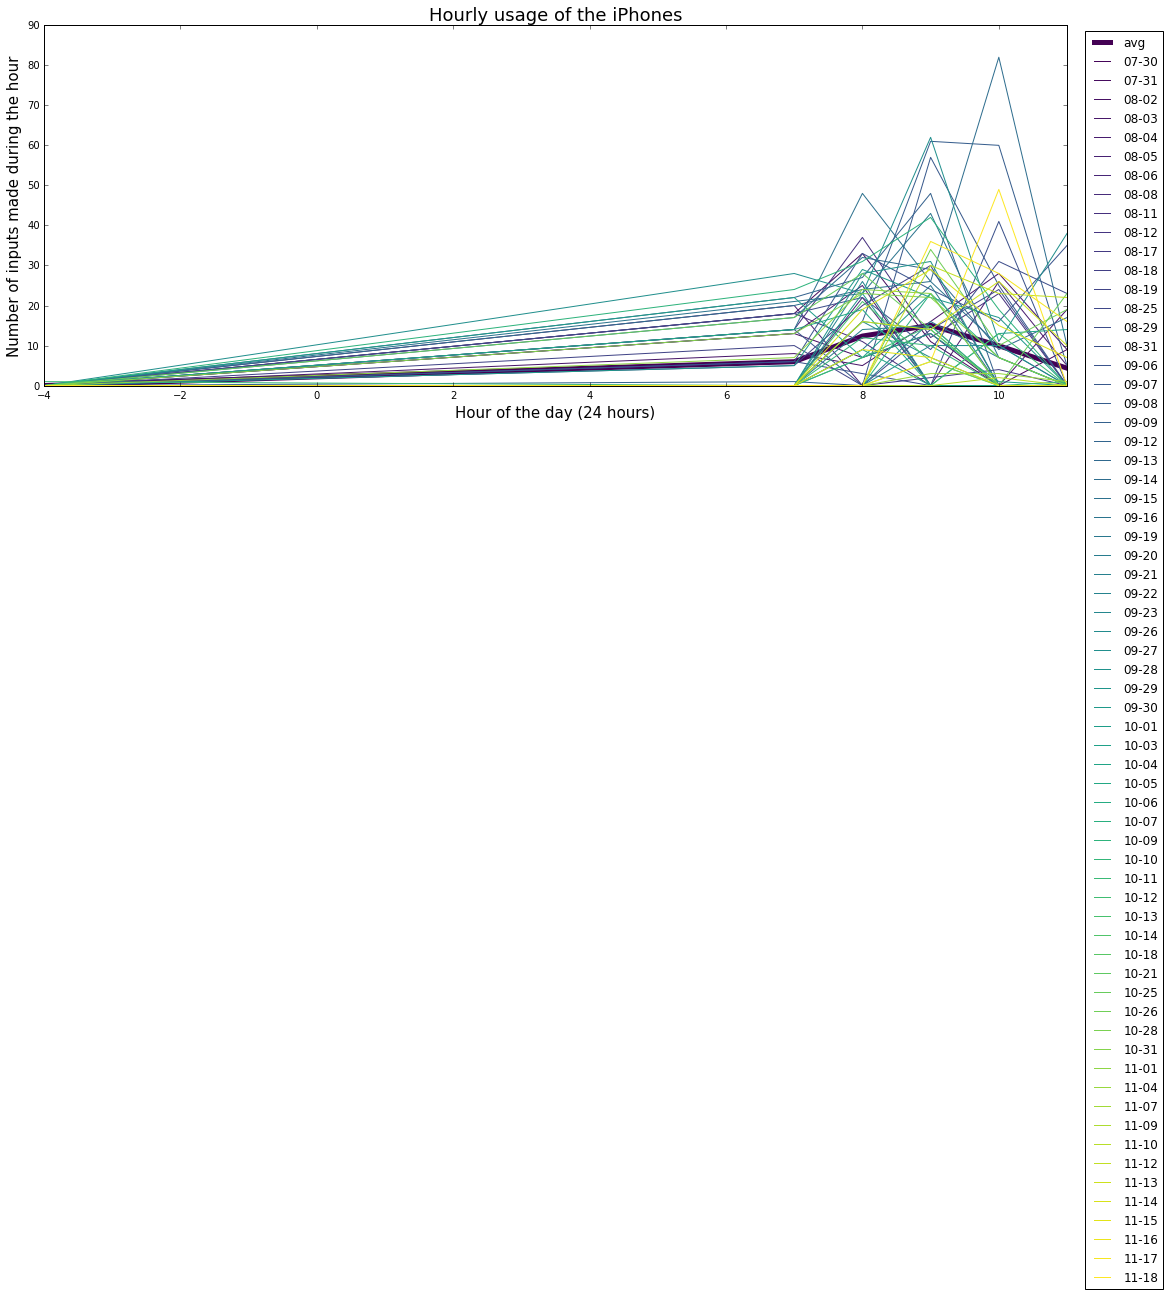

In [33]:
font_size = 15

colors = plt.get_cmap('viridis')
df_hourly.set_index(df_hourly.index + 7 -12, inplace=True)
ax = df_hourly.plot(figsize=(15,6), colormap='viridis')
ax.lines[0].set_linewidth(5)
ax.set_title('Hourly usage of the iPhones', fontsize=1.2*font_size)
ax.set_xlabel('Hour of the day (24 hours)', fontsize=font_size)
ax.set_ylabel('Number of inputs made during the hour', fontsize=font_size)
ax.legend(bbox_to_anchor=(1.10, 1.0))

plt.tight_layout()
# plt.savefig(save_dir+'hourly_usage.png', transparent=True,  bbox_inches='tight')

In [34]:
df_hourly.index

Int64Index([-4, 7, 8, 9, 10, 11], dtype='int64')

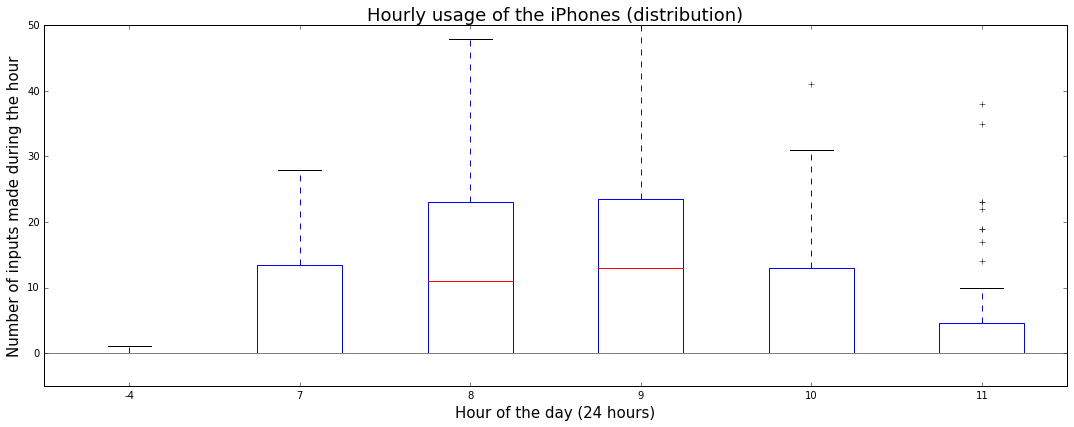

In [35]:
ax = df_hourly.T.plot(kind='box', figsize=(15, 6))
ax.set_title('Hourly usage of the iPhones (distribution)', fontsize=1.2*font_size)
ax.set_xlabel('Hour of the day (24 hours)', fontsize=font_size)
ax.set_ylabel('Number of inputs made during the hour', fontsize=font_size)
ax.set_ylim([-5, 50])

#draw line at y = 0
plt.axhline(0, color='grey')

plt.tight_layout()
plt.savefig(save_dir+'/hourly_usage_dist.png', transparent=True)